In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, NuSVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2021.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1,0.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,15.0,0.0,1.0,1,7,6.0,9.0
1,0.0,0,1.0,1,27.0,1.0,0.0,0.0,1,0,...,1,0.0,2.0,1.0,2.0,0.0,1,7,6.0,6.0
2,0.0,0,1.0,1,26.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,30.0,0.0,1,13,4.0,3.0
3,0.0,0,0.0,1,19.0,1.0,0.0,0.0,1,1,...,1,0.0,3.0,0.0,0.0,0.0,0,11,5.0,7.0
4,0.0,1,0.0,1,37.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,0,5,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67131,1.0,1,0.0,1,27.0,0.0,0.0,0.0,1,1,...,1,0.0,3.0,0.0,0.0,0.0,1,11,5.0,6.0
67132,1.0,1,1.0,1,26.0,0.0,0.0,0.0,0,1,...,1,0.0,4.0,0.0,0.0,0.0,0,11,4.0,2.0
67133,1.0,1,1.0,1,32.0,0.0,0.0,1.0,1,0,...,1,1.0,2.0,10.0,0.0,0.0,1,8,6.0,6.0
67134,1.0,1,1.0,1,33.0,0.0,0.0,0.0,0,0,...,1,0.0,2.0,0.0,0.0,1.0,1,10,4.0,5.0


# **Exploring Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67136 entries, 0 to 67135
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       67136 non-null  float64
 1   HighBP                67136 non-null  int64  
 2   HighChol              67136 non-null  float64
 3   CholCheck             67136 non-null  int64  
 4   BMI                   67136 non-null  float64
 5   Smoker                67136 non-null  float64
 6   Stroke                67136 non-null  float64
 7   HeartDiseaseorAttack  67136 non-null  float64
 8   PhysActivity          67136 non-null  int64  
 9   Fruits                67136 non-null  int64  
 10  Veggies               67136 non-null  int64  
 11  HvyAlcoholConsump     67136 non-null  int64  
 12  AnyHealthcare         67136 non-null  int64  
 13  NoDocbcCost           67136 non-null  float64
 14  GenHlth               67136 non-null  float64
 15  MentHlth           

In [4]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,...,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000
mean,0.500000,0.548320,0.500238,0.976227,30.288340,0.440151,0.058866,0.136633,0.717260,0.605919,...,0.967260,0.066522,2.774756,4.230845,5.136752,0.231202,0.493431,8.501743,5.035912,6.563885
std,0.500004,0.497663,0.500004,0.152341,7.095737,0.496409,0.235375,0.343462,0.450334,0.488656,...,0.177955,0.249194,1.073759,8.323138,9.593837,0.421605,0.499961,3.019624,0.981610,2.422641
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,5.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,1.000000,34.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,5.000000,0.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [5]:
df.duplicated().sum()

737

# **Data Cleaning**

In [6]:
# Dropping unnecessary features

df.drop(['Income', 'Education'], axis = 1, inplace = True)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1,0.0,1,33.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,15.0,0.0,1.0,1,7
1,0.0,0,1.0,1,27.0,1.0,0.0,0.0,1,0,0,0,1,0.0,2.0,1.0,2.0,0.0,1,7
2,0.0,0,1.0,1,26.0,1.0,0.0,0.0,0,0,0,0,1,0.0,3.0,0.0,30.0,0.0,1,13
3,0.0,0,0.0,1,19.0,1.0,0.0,0.0,1,1,1,0,1,0.0,3.0,0.0,0.0,0.0,0,11
4,0.0,1,0.0,1,37.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,0.0,0.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67131,1.0,1,0.0,1,27.0,0.0,0.0,0.0,1,1,1,0,1,0.0,3.0,0.0,0.0,0.0,1,11
67132,1.0,1,1.0,1,26.0,0.0,0.0,0.0,0,1,1,0,1,0.0,4.0,0.0,0.0,0.0,0,11
67133,1.0,1,1.0,1,32.0,0.0,0.0,1.0,1,0,0,0,1,1.0,2.0,10.0,0.0,0.0,1,8
67134,1.0,1,1.0,1,33.0,0.0,0.0,0.0,0,0,1,0,1,0.0,2.0,0.0,0.0,1.0,1,10


In [7]:
# Dropping Duplicates

df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [8]:
# Converting datatypes of some features

df['Diabetes_binary']=df['Diabetes_binary'].astype(int)
df['Age']=df['Age'].astype(int)
df['Sex']=df['Sex'].astype(int)
df['Smoker']=df['Smoker'].astype(int)
df['Stroke']=df['Stroke'].astype(int)

C:\Users\hassa\AppData\Local\Temp\ipykernel_10000\3309364861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diabetes_binary']=df['Diabetes_binary'].astype(int)
C:\Users\hassa\AppData\Local\Temp\ipykernel_10000\3309364861.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']=df['Age'].astype(int)
C:\Users\hassa\AppData\Local\Temp\ipykernel_10000\3309364861.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [9]:
df.shape

(61709, 20)

In [10]:
df['Diabetes_binary'].value_counts()

Diabetes_binary
1    31768
0    29941
Name: count, dtype: int64

# **Data Preprocessing**

In [11]:
X = df[df.columns[1:]]

In [12]:
Y = df['Diabetes_binary']

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.2, random_state = 50)

In [14]:
columnss = X.columns

In [15]:
# Use MinMaxScaler to scale the features in the DataFrame 'X'
from sklearn.preprocessing import MinMaxScaler

# Create MinMaxScaler object
min_max_scaler = MinMaxScaler()

# Scale the features and create a new DataFrame 'X'
x_scaled_minmax = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled_minmax, columns = columnss)

# Display the head of the scaled features DataFrame
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,1.0,0.0,1.0,0.241379,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.25,0.500000,0.000000,1.0,1.0,0.500000
1,0.0,1.0,1.0,0.172414,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.25,0.033333,0.066667,0.0,1.0,0.500000
2,0.0,1.0,1.0,0.160920,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.50,0.000000,1.000000,0.0,1.0,1.000000
3,0.0,0.0,1.0,0.080460,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.50,0.000000,0.000000,0.0,0.0,0.833333
4,1.0,0.0,1.0,0.287356,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.25,0.000000,0.000000,0.0,0.0,0.333333


# C-SVC

### Linear

In [16]:
svm = SVC(C=1, kernel='linear', random_state=42 , decision_function_shape='ovr')

In [17]:
svm.fit(xtrain, ytrain)

SVC(C=1, kernel='linear', random_state=42)

In [18]:
pred = svm.predict(xtest)

In [20]:
c_lr_acc = accuracy_score(ytest, pred)
print(f'Accuracy: {c_lr_acc}')
print(classification_report(ytest,pred))

Accuracy: 0.7304326689353428
              precision    recall  f1-score   support

           0       0.75      0.68      0.71      6035
           1       0.72      0.78      0.75      6307

    accuracy                           0.73     12342
   macro avg       0.73      0.73      0.73     12342
weighted avg       0.73      0.73      0.73     12342



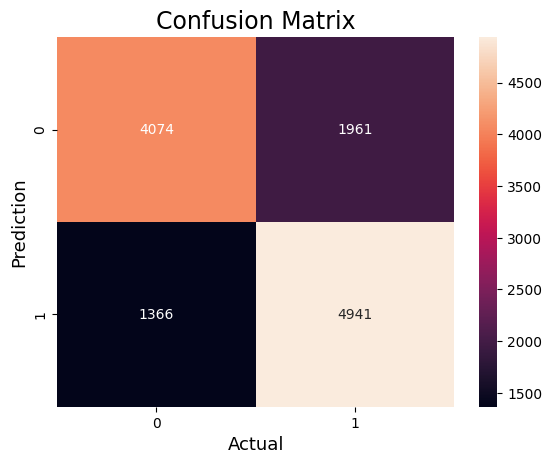

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,pred)
sns.heatmap(cm, annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### Polynomial

In [22]:
svm = SVC(C=1, kernel='poly', random_state=42 , decision_function_shape='ovr')

In [23]:
svm.fit(xtrain, ytrain)

SVC(C=1, kernel='poly', random_state=42)

In [24]:
pred = svm.predict(xtest)

In [25]:
c_poly_acc = accuracy_score(ytest, pred)
print(f'Accuracy: {c_poly_acc}')
print(classification_report(ytest,pred))

Accuracy: 0.7333495381623724
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      6035
           1       0.74      0.74      0.74      6307

    accuracy                           0.73     12342
   macro avg       0.73      0.73      0.73     12342
weighted avg       0.73      0.73      0.73     12342



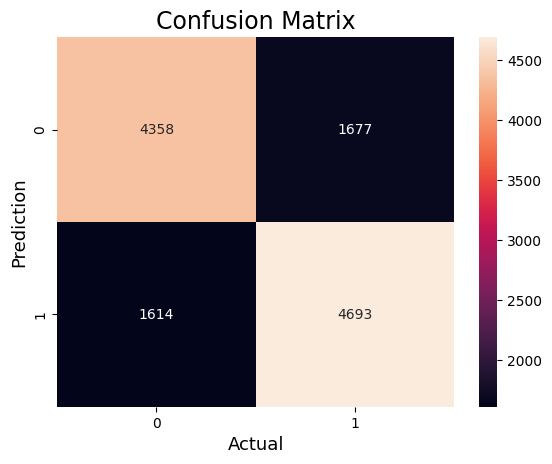

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,pred)
sns.heatmap(cm, annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### Sigmoid

In [27]:
svm = SVC(C=1, kernel='sigmoid', random_state=42 , decision_function_shape='ovr')

In [28]:
svm.fit(xtrain, ytrain)

SVC(C=1, kernel='sigmoid', random_state=42)

In [29]:
pred = svm.predict(xtest)

In [30]:
c_sigmoid_acc = accuracy_score(ytest, pred)
print(f'Accuracy: {c_sigmoid_acc}')
print(classification_report(ytest,pred))

Accuracy: 0.6559714795008913
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      6035
           1       0.66      0.67      0.66      6307

    accuracy                           0.66     12342
   macro avg       0.66      0.66      0.66     12342
weighted avg       0.66      0.66      0.66     12342



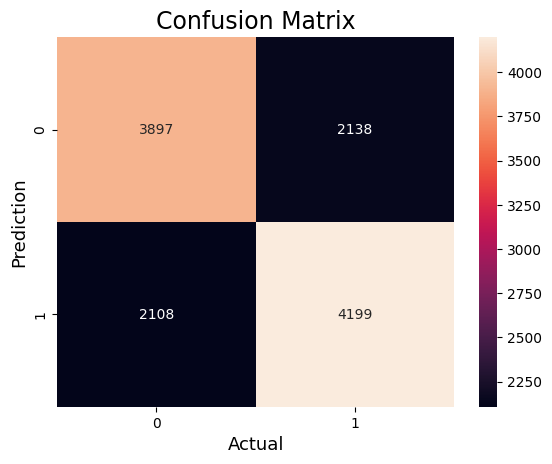

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,pred)
sns.heatmap(cm, annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### RBF

In [54]:
svm = SVC(C=1, kernel='rbf', random_state=42 , decision_function_shape='ovr')

In [55]:
svm.fit(xtrain, ytrain)

SVC(C=1, random_state=42)

In [56]:
pred = svm.predict(xtest)

In [57]:
c_rbf_acc = accuracy_score(ytest, pred)
print(f'Accuracy: {c_rbf_acc}')
print(classification_report(ytest,pred))

Accuracy: 0.7341597796143251
              precision    recall  f1-score   support

           0       0.76      0.66      0.71      6035
           1       0.71      0.80      0.76      6307

    accuracy                           0.73     12342
   macro avg       0.74      0.73      0.73     12342
weighted avg       0.74      0.73      0.73     12342



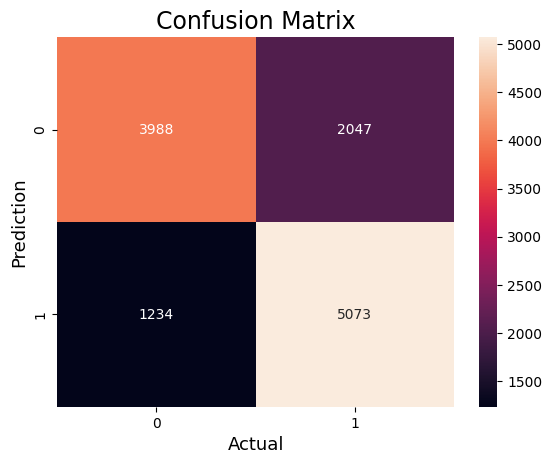

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,pred)
sns.heatmap(cm, annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Nu-SVM

### Linear

In [38]:
nu_svr = NuSVC(kernel='linear', nu=0.1, random_state=42, verbose=True, decision_function_shape='ovr')  # You can adjust the 'nu' parameter
nu_svr.fit(xtrain, ytrain)

[LibSVM]

NuSVC(kernel='linear', nu=0.1, random_state=42, verbose=True)

In [39]:
pred = nu_svr.predict(xtest)

In [40]:
nu_lr_acc = accuracy_score(ytest, pred)
print(f'Accuracy: {nu_lr_acc}')
print(classification_report(ytest,pred))

Accuracy: 0.4763409496029817
              precision    recall  f1-score   support

           0       0.42      0.19      0.26      6035
           1       0.49      0.75      0.59      6307

    accuracy                           0.48     12342
   macro avg       0.46      0.47      0.43     12342
weighted avg       0.46      0.48      0.43     12342



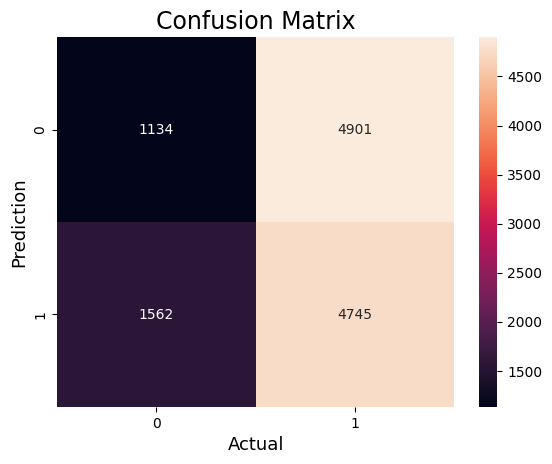

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,pred)
sns.heatmap(cm, annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### Polynomial

In [42]:
nu_svr = NuSVC(kernel='poly', nu=0.1, random_state=42, verbose=True, decision_function_shape='ovr')  # You can adjust the 'nu' parameter
nu_svr.fit(xtrain, ytrain)

[LibSVM]

NuSVC(kernel='poly', nu=0.1, random_state=42, verbose=True)

In [43]:
pred = nu_svr.predict(xtest)

In [44]:
nu_poly_acc = accuracy_score(ytest, pred)
print(f'Accuracy: {nu_poly_acc}')
print(classification_report(ytest,pred))

Accuracy: 0.6373359261059796
              precision    recall  f1-score   support

           0       0.60      0.77      0.68      6035
           1       0.70      0.51      0.59      6307

    accuracy                           0.64     12342
   macro avg       0.65      0.64      0.63     12342
weighted avg       0.65      0.64      0.63     12342



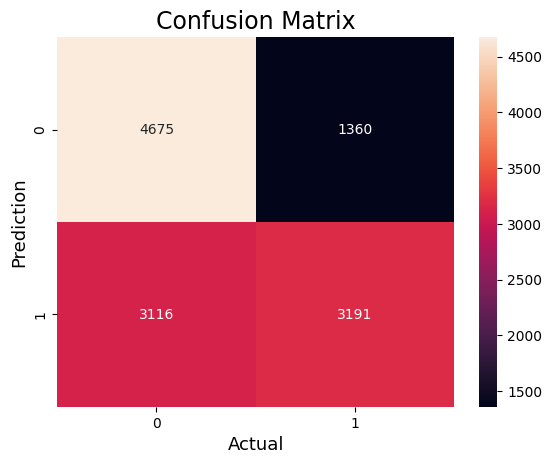

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,pred)
sns.heatmap(cm, annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### Sigmoid

In [46]:
nu_svr = NuSVC(kernel='sigmoid', nu=0.1, random_state=42, verbose=True, decision_function_shape='ovr')  # You can adjust the 'nu' parameter
nu_svr.fit(xtrain, ytrain)

[LibSVM]

NuSVC(kernel='sigmoid', nu=0.1, random_state=42, verbose=True)

In [47]:
pred = nu_svr.predict(xtest)

In [48]:
nu_sigmoid_acc = accuracy_score(ytest, pred)
print(f'Accuracy: {nu_sigmoid_acc}')
print(classification_report(ytest,pred))

Accuracy: 0.5892075838599903
              precision    recall  f1-score   support

           0       0.55      0.88      0.68      6035
           1       0.73      0.31      0.44      6307

    accuracy                           0.59     12342
   macro avg       0.64      0.60      0.56     12342
weighted avg       0.64      0.59      0.55     12342



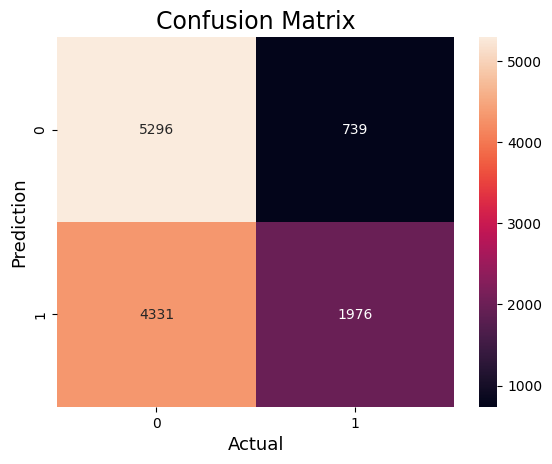

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,pred)
sns.heatmap(cm, annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### RBF

In [50]:
nu_svr = NuSVC(kernel='rbf', nu=0.1, random_state=42, verbose=True, decision_function_shape='ovr')  # You can adjust the 'nu' parameter
nu_svr.fit(xtrain, ytrain)

[LibSVM]

NuSVC(nu=0.1, random_state=42, verbose=True)

In [51]:
pred = nu_svr.predict(xtest)

In [52]:
nu_rbf_acc = accuracy_score(ytest, pred)
print(f'Accuracy: {nu_rbf_acc}')
print(classification_report(ytest,pred))

Accuracy: 0.47212769405282773
              precision    recall  f1-score   support

           0       0.47      0.71      0.57      6035
           1       0.47      0.25      0.32      6307

    accuracy                           0.47     12342
   macro avg       0.47      0.48      0.45     12342
weighted avg       0.47      0.47      0.44     12342



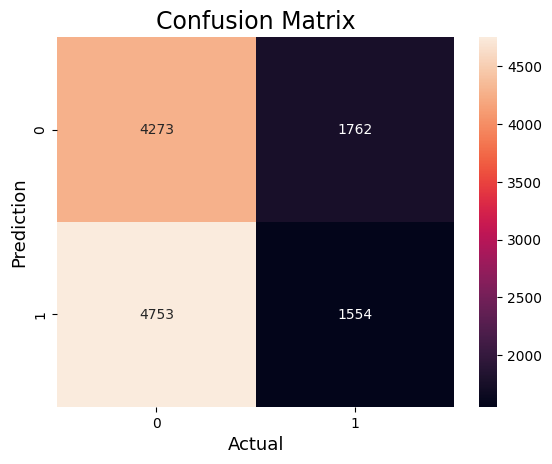

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,pred)
sns.heatmap(cm, annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Comparison

In [64]:
comparison_dict={"Algorithm":["Linear C-SVM","Poly C-SVM","Sigmoid C-SVM","RBF C-SVM","Linear Nu-SVM","Poly Nu-SVM","Sigmoid Nu-SVM","RBF Nu-SVM"],
                 "Accuracy":[c_lr_acc*100,c_poly_acc*100,c_sigmoid_acc*100,c_rbf_acc*100,nu_lr_acc*100,nu_poly_acc*100,nu_sigmoid_acc*100,nu_rbf_acc*100],
                 
                }

In [65]:
comparison = pd.DataFrame(comparison_dict)
comparison.sort_values(['Accuracy'], ascending=False)

,Algorithm,Accuracy
3,RBF C-SVM,73.415978
1,Poly C-SVM,73.334954
0,Linear C-SVM,73.043267
2,Sigmoid C-SVM,65.597148
5,Poly Nu-SVM,63.733593
6,Sigmoid Nu-SVM,58.920758
4,Linear Nu-SVM,47.634095
7,RBF Nu-SVM,47.212769


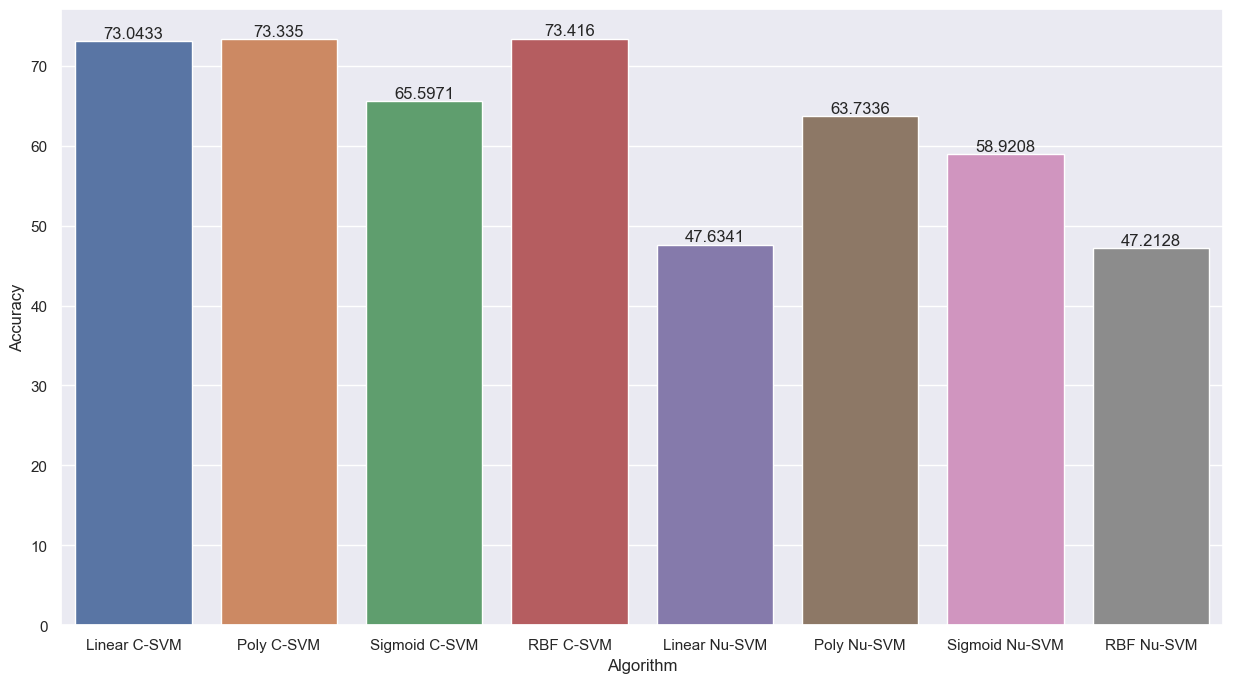

In [73]:
ax = sns.barplot(x='Algorithm', y='Accuracy', data=comparison )
sns.set(rc={'figure.figsize':(15,9)})
for bars in ax.containers:
  ax.bar_label(bars)